In [14]:
from typing_extensions import TypedDict 
from pydantic import BaseModel
from langgraph.graph import StateGraph, START, END 

# Reducers 
from typing import Annotated 
from langgraph.graph.message import add_messages

In [15]:
# class State(TypedDict):
#     messages: Annotated[list, add_messages]

class State(BaseModel):
    messages: Annotated[list, add_messages]

In [5]:
import os 
from dotenv import load_dotenv

load_dotenv()

os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

In [7]:
from langchain_groq import ChatGroq 

llm_groq = ChatGroq(model="openai/gpt-oss-20b")
llm_groq.invoke("Hello, I am Indrasis")

AIMessage(content='Hello, Indrasis! 👋 How can I assist you today?', additional_kwargs={'reasoning_content': 'The user just says "Hello, I am Indrasis". Likely greeting. We should respond politely, maybe ask how we can help.'}, response_metadata={'token_usage': {'completion_tokens': 54, 'prompt_tokens': 78, 'total_tokens': 132, 'completion_time': 0.057451017, 'prompt_time': 0.004356328, 'queue_time': 0.051007047, 'total_time': 0.061807345}, 'model_name': 'openai/gpt-oss-20b', 'system_fingerprint': 'fp_e99e93f2ac', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--6ac59f98-9fc4-44c1-a92f-2b7b960b4b92-0', usage_metadata={'input_tokens': 78, 'output_tokens': 54, 'total_tokens': 132})

In [9]:
def superbot(state: State):
    return {"messages": llm_groq.invoke(state["messages"])}

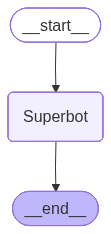

In [10]:
graph = StateGraph(State)

graph.add_node("Superbot", superbot)

graph.add_edge(START, "Superbot")
graph.add_edge("Superbot", END)

graph_builder = graph.compile()

from IPython.display import Image, display 
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [11]:
graph_builder.invoke({"messages": "Hi, I'm learning Agentic AI"})

{'messages': [HumanMessage(content="Hi, I'm learning Agentic AI", additional_kwargs={}, response_metadata={}, id='fc07c650-af56-49ff-98c5-95bd20eb4eda'),
  AIMessage(content='Hello! 👋  \nIt’s great that you’re diving into Agentic AI.  “Agentic” usually means *autonomous agents that can perceive, reason, and act in a world to achieve goals*—the kind of systems that drive self‑driving cars, personal assistants, or even multi‑agent simulations.\n\nBelow is a quick “starter kit” that covers the big ideas, key resources, and a few practical next steps.  Feel free to let me know which parts you’d like to explore deeper (e.g., theory, coding, ethics, or a specific domain like robotics or LLM‑based agents).\n\n---\n\n## 1. Core Concepts\n\n| Component | What it is | Typical Tech |\n|-----------|------------|--------------|\n| **Perception** | How the agent senses its environment (sensors, vision, language) | CNNs, transformers, LIDAR, NLP models |\n| **World Model** | Internal representation o

In [16]:
for event in graph_builder.stream({"messages": "I'm learning LangGraph"}):
    print(event)

{'Superbot': {'messages': AIMessage(content='Great! LangGraph is a powerful framework for building **graph‑based language model applications**—think of it as a way to stitch together multiple LLM calls, external tools, and custom logic into a cohesive flow that can learn, adapt, and reason over time.\n\nBelow is a quick “starter kit” that covers:\n\n1. **What LangGraph really is**  \n2. **Why you’d want to use it**  \n3. **Core concepts**  \n4. **A minimal example**  \n5. **Where to go from here** (docs, tutorials, community)\n\nFeel free to jump to the section that matches your current level of knowledge or ask follow‑up questions.\n\n---\n\n## 1. What is LangGraph?\n\nLangGraph (short for *Language Model Graph*) is a framework built on top of the **LangChain** ecosystem that lets you:\n\n| Feature | How it works |\n|---------|--------------|\n| **Graph nodes** | Each node represents a unit of computation (e.g., a prompt, a tool call, a data fetch, or a custom function). |\n| **Edges*